# Comparisons of python and C++ implementations of the Kalman Filter class applied to the 1D trajectory problem

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
# Eventually, we want to set the parameters of the physical model and the Kalman filter from this file, then
# be able to run the Kalman filter using python, and the compiled C++ code, with exactly the same parameters 
# and measurements.

# For now, I will do things manually to see if the Kalman filter from python and c++ give the same results.


In [19]:
# import the Kalman filter class
from kalman_python import kf

In [20]:
# Load the cpp implementation data, since we need to use the same measurements
cpp_data = pd.read_csv('../build/bin/kalman_output.csv')

cpp_data.head()

# save measurements in a list

,time,true,measurement,prediction,update
0,0.0,0.00000,-6.19868,0.000000,-0.525905
1,0.1,4.95095,2.91359,-0.671815,-0.119521
2,0.2,9.80380,17.86380,-0.317506,1.676470
3,0.3,14.55860,16.55740,1.533770,3.150400
4,0.4,19.21520,26.12920,3.025070,5.374780


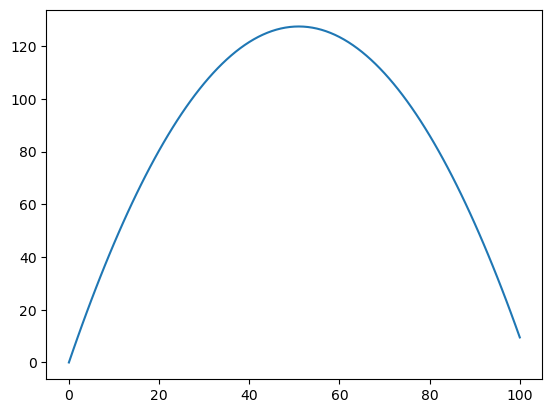

In [21]:
plt.plot(cpp_data['true'])

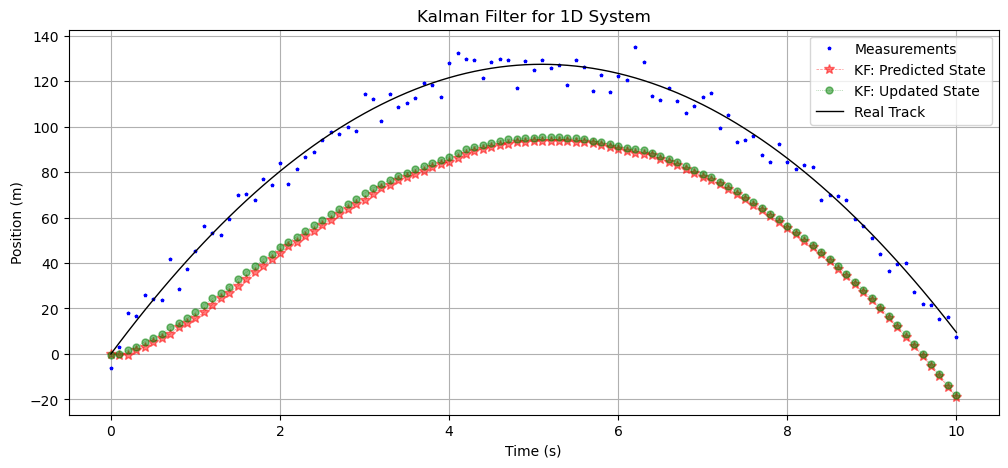

In [22]:
# plot the cpp filter results

# plot the results
fig = plt.figure(figsize=(12, 5))

plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(cpp_data['time'], cpp_data['prediction'],'*--', label='KF: Predicted State',  color='r', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['update'], 'o:', label='KF: Updated State',  color='g', markersize=5, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['true'], label='Real Track', color='black', linewidth=1)

plt.legend(loc='upper right')
plt.title('Kalman Filter for 1D System')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.show()

# Python implementation

In [23]:
# run the Kalman filter in python with the same parameters as in the cpp implementation

# set parameters for test run

dt = 0.1 # time step
tf = 10
times = np.arange(0, tf+dt, dt) # time list
a=-9.81

var_x = 0.1 # variance of position
var_v = 0.1 # variance of velocity
cov_xv = 0.1 # covariance of position and velocity

kalman = kf(dt, var_x, var_v, cov_xv, a) # create an instance of the kalman filter class

measurements = [] # empty list to store measurements at each time step
predictions = [] # empty list to store predicted states at each time step  
updates = [] # empty list to store updated states at each time step

# loop through the position values of the trajectory (one at each time step)
for i, x in enumerate(cpp_data['true']):
    
    x_pred = kalman.predictions().item(0) # extract the predicted position from the state vector
    predictions.append(x_pred) # save the prediction

    # take measurement and save the result
    # measurement = x + np.random.normal(0, 3) # add Gaussian noise to the true position to mimick measurements
    
    # pick out measurement from the cpp data
    measurement = cpp_data['measurement'].iloc[i] # get the measurement from the cpp data
    measurements.append(measurement) # save the measurement
    
    # update the prediction with the measurement
    x_update = kalman.updates(measurement).item(0) # extract the updated position from the state vector
    updates.append(x_update) # save the update
    

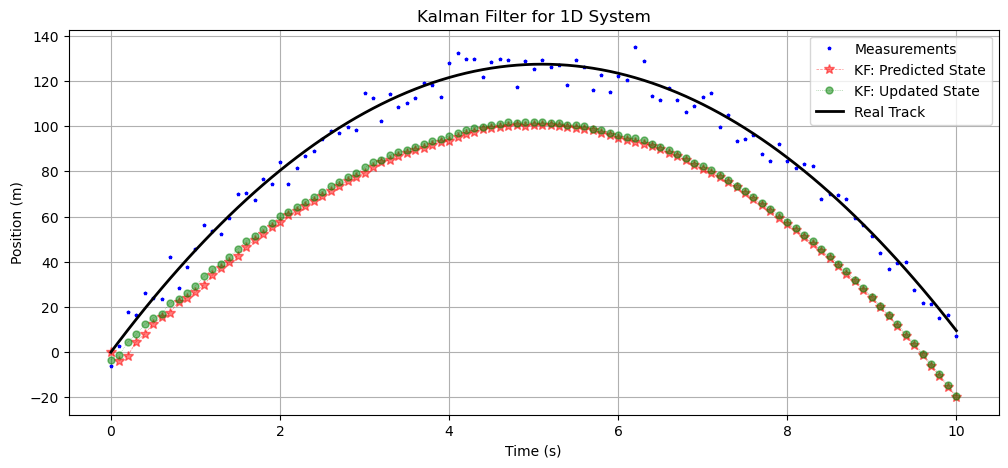

In [24]:
# plot the results
fig = plt.figure(figsize=(12, 5))

plt.plot(times, measurements, '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(times, predictions,'*--', label='KF: Predicted State',  color='r', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(times, updates, 'o:', label='KF: Updated State',  color='g', markersize=5, linewidth=0.5, alpha=0.5)
plt.plot(times, cpp_data['true'], label='Real Track', color='black', linewidth=2)

plt.legend(loc='upper right')
plt.title('Kalman Filter for 1D System')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.show()